# Pokemon コンペティション

### コンペ概要
ポケモンの能力値等を示すいくつかの変数からポケモンの対戦結果を予測するコンペです.
(期間: ~ 5/28 23:59)

### 配布データ
- train.csv: 訓練用のデータです. `pokemon.csv`のidに対応しています．
  - First_pokemon: ポケモンのid
  - Second_pokemon: ポケモンのid
  - Winner: 対戦で勝利したポケモンのid
- test.csv: このファイルのデータに対して勝利するポケモンを予測してもらいます.
- pokemon.csv: ポケモンの能力値のデータです． `#` カラムがidを表しています．

### 提出物

test.csvのデータに対して, `First_pokemon` が勝利する確率 `probability` を予測し, 以下のような形式のcsvファイル```submission.csv```を作成してiLect上で提出してください. ただし, 予測値は0以上1以下の値を出力してください.

```
id,probability
0,0.5
1,0.5
...

```

注意点
- 1行目はヘッダーです. 必ず```id,probability```と書いてください.
- 2行目以降は, test.csvのデータの順番と対応させる形でidと予測値を各行に1つずつ出力してください. (idは昇順に並んでいます)
- sample_submission.csvが提出形式のサンプルになので, こちらも参照してみてください.
- **提出前にフォーマットが合っているか必ず確認してください**

### 評価指標
LogLossで評価します.
データ数: N, 真の値: $y$, 予測値: $\hat{y}$ とすると, LogLossは

$$
LogLoss = -\frac{1}{N} \sum_{i=1}^{N}y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})
$$

で定義されます.

### 賞金
```
1位: 15,000円
2位: 10,000円
3位: 5,000円
```


# データの観察

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')
pokemon = pd.read_csv('pokemon.csv')

In [4]:
data.head()

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206


In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
data.shape

(40000, 4)

In [7]:
wins = np.zeros(len(pokemon))
loses = np.zeros(len(pokemon))
for d in data.values:
    if d[1] == d[3]:
        loses[d[2]-1] += 1
    else:
        loses[d[1]-1] += 1
    wins[d[3]-1] += 1

In [8]:
matches = wins + loses

In [9]:
win_rate = wins / matches

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [10]:
win_rate[np.isnan(win_rate)] = 0

In [11]:
win_rate

array([0.28440367, 0.41747573, 0.65789474, 0.54716981, 0.48913043,
       0.55789474, 0.86538462, 0.84070796, 0.85436893, 0.17021277,
       0.36734694, 0.        , 0.56666667, 0.14583333, 0.11538462,
       0.62626263, 0.20731707, 0.13333333, 0.63207547, 0.97802198,
       0.35643564, 0.54639175, 0.87619048, 0.94949495, 0.5       ,
       0.72727273, 0.45454545, 0.81443299, 0.39      , 0.56074766,
       0.65714286, 0.87777778, 0.        , 0.53333333, 0.17894737,
       0.39655172, 0.5483871 , 0.25225225, 0.42574257, 0.57522124,
       0.15384615, 0.42105263, 0.38834951, 0.81081081, 0.11428571,
       0.        , 0.34513274, 0.75471698, 0.06542056, 0.22321429,
       0.34020619, 0.1       , 0.20325203, 0.20833333, 0.68103448,
       0.57142857, 0.82828283, 0.6446281 , 0.84946237, 0.3364486 ,
       0.69892473, 0.5       , 0.77906977, 0.43678161, 0.81521739,
       0.        , 0.70873786, 0.47524752, 0.29032258, 0.62037037,
       0.75438596, 0.79347826, 0.13114754, 0.22916667, 0.40659

In [12]:
non_match_pokemon_idx = np.where(matches==0)[0]
non_match_pokemon_idx

array([ 11,  32,  45,  65,  77,  89, 143, 182, 235, 321, 418, 478, 555,
       617, 654, 781])

In [13]:
test = pd.read_csv('test.csv')

In [14]:
test.head()

,id,First_pokemon,Second_pokemon
0,0,85,602
1,1,536,155
2,2,189,644
3,3,526,166
4,4,690,772


In [15]:
f_p = test.loc[:,['First_pokemon']].values
s_p = test.loc[:,['Second_pokemon']].values

In [16]:
for p in s_p:
    if p in non_match_pokemon_idx+1:
        print(p)

In [17]:
for p in f_p:
    if p in non_match_pokemon_idx+1:
        print(p)

trainデータに載ってないポケモンはtestデータにも登場しない

In [18]:
win_rate_sorted = win_rate.copy()
win_rate_sorted.sort()
win_rate_sorted

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00970874, 0.01869159, 0.03921569,
       0.04081633, 0.04395604, 0.04545455, 0.04854369, 0.05050505,
       0.05263158, 0.05263158, 0.05882353, 0.06060606, 0.06382979,
       0.06542056, 0.06666667, 0.06730769, 0.07070707, 0.07317073,
       0.07368421, 0.07894737, 0.08080808, 0.08080808, 0.08256881,
       0.08333333, 0.08653846, 0.08823529, 0.0952381 , 0.09734513,
       0.1       , 0.10091743, 0.10309278, 0.10377358, 0.10483871,
       0.10638298, 0.10714286, 0.11      , 0.11009174, 0.11111111,
       0.11340206, 0.11428571, 0.11538462, 0.11650485, 0.11650485,
       0.11711712, 0.12244898, 0.125     , 0.125     , 0.12745098,
       0.13114754, 0.13333333, 0.13414634, 0.13432836, 0.13483146,
       0.13978495, 0.14035088, 0.14049587, 0.14102564, 0.14150

In [19]:
len(matches[matches==0])

16

全勝はなし、全敗が1

In [20]:
np.where((win_rate==0) & (matches!=0))

(array([230]),)

231のポケモンが勝率0（外れ値？）

In [21]:
matches[230]

109.0

これは外れ値でいいだろう

In [22]:
pokemon.iloc[230,:]

#                 231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object

ツボツボ

In [23]:
pokemon.iloc[np.where(win_rate==win_rate.max())[0][0],:]

#                         155
Name          Mega Aerodactyl
Type 1                   Rock
Type 2                 Flying
HP                         80
Attack                    135
Defense                    85
Sp. Atk                    70
Sp. Def                    95
Speed                     150
Generation                  1
Legendary               False
Name: 154, dtype: object

メガプテラ

In [24]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [25]:
from xgboost.sklearn import XGBClassifier

# データの整形

In [26]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [27]:
pokemon = pd.concat([pokemon, pd.get_dummies(pokemon['Type 1']), pd.get_dummies(pokemon['Type 2'])], axis=1)

In [28]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,0,0,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,0,0,0,0,0,1,0,0,0,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,0


In [29]:
pokemon.iloc[4,:]

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Bug                    0
Dark                   0
Dragon                 0
Electric               0
Fairy                  0
Fighting               0
Fire                   1
Flying                 0
Ghost                  0
Grass                  0
Ground                 0
Ice                    0
Normal                 0
Poison                 0
Psychic                0
Rock                   0
Steel                  0
Water                  0
Bug                    0
Dark                   0
Dragon                 0
Electric               0
Fairy                  0
Fighting               0
Fire                   0
Flying                 0
Ghost                  0
Grass                  0


In [30]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon',
       'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
       'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel',
       'Water', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [31]:
pokemon.columns = np.concatenate((pokemon.columns[:12],  'type_1_' + pokemon.columns[12:30].values, 'type_2_' + pokemon.columns[30:].values))

In [32]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'type_1_Bug',
       'type_1_Dark', 'type_1_Dragon', 'type_1_Electric', 'type_1_Fairy',
       'type_1_Fighting', 'type_1_Fire', 'type_1_Flying', 'type_1_Ghost',
       'type_1_Grass', 'type_1_Ground', 'type_1_Ice', 'type_1_Normal',
       'type_1_Poison', 'type_1_Psychic', 'type_1_Rock', 'type_1_Steel',
       'type_1_Water', 'type_2_Bug', 'type_2_Dark', 'type_2_Dragon',
       'type_2_Electric', 'type_2_Fairy', 'type_2_Fighting', 'type_2_Fire',
       'type_2_Flying', 'type_2_Ghost', 'type_2_Grass', 'type_2_Ground',
       'type_2_Ice', 'type_2_Normal', 'type_2_Poison', 'type_2_Psychic',
       'type_2_Rock', 'type_2_Steel', 'type_2_Water'],
      dtype='object')

In [33]:
data.head()

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206


In [34]:
winner = []
for d in data.values:
    if d[3] == d[1]:
        winner.append(0)
    else:
        winner.append(1)
winner = pd.DataFrame({'winner': winner})

In [35]:
X = data.copy().drop('Winner', axis=1)
X.head()

,id,First_pokemon,Second_pokemon
0,0,88,85
1,1,466,408
2,2,715,120
3,3,467,377
4,4,416,206


In [36]:
first_pokemon = pd.DataFrame(columns=pokemon.columns)
second_pokemon = pd.DataFrame(columns=pokemon.columns)
for d in data.values:
    first_pokemon = first_pokemon.append(pokemon.iloc[d[1]-1,:])
    second_pokemon = second_pokemon.append(pokemon.iloc[d[2]-1,:])

In [37]:
print(first_pokemon.shape)
print(second_pokemon.shape)
print(X.shape)

(40000, 48)
(40000, 48)
(40000, 3)


In [38]:
first_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,type_2_Ghost,type_2_Grass,type_2_Ground,type_2_Ice,type_2_Normal,type_2_Poison,type_2_Psychic,type_2_Rock,type_2_Steel,type_2_Water
87,88,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,...,0,0,0,0,0,0,1,0,0,0
465,466,Buizel,Water,NaN,55,65,35,60,30,85,...,0,0,0,0,0,0,0,0,0,0
714,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,129,90,108,...,0,0,0,0,0,0,0,0,0,0
466,467,Floatzel,Water,NaN,85,105,55,85,50,115,...,0,0,0,0,0,0,0,0,0,0
415,416,Regice,Ice,NaN,80,50,100,100,200,50,...,0,0,0,0,0,0,0,0,0,0


In [39]:
second_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,type_2_Ghost,type_2_Grass,type_2_Ground,type_2_Ice,type_2_Normal,type_2_Poison,type_2_Psychic,type_2_Rock,type_2_Steel,type_2_Water
84,85,Rapidash,Fire,NaN,65,100,70,80,80,105,...,0,0,0,0,0,0,0,0,0,0
407,408,Shelgon,Dragon,NaN,65,95,100,60,50,50,...,0,0,0,0,0,0,0,0,0,0
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,...,0,0,0,0,0,0,0,1,0,0
376,377,Claydol,Ground,Psychic,60,70,105,70,120,75,...,0,0,0,0,0,0,1,0,0,0
205,206,Aipom,Normal,NaN,55,70,55,40,55,85,...,0,0,0,0,0,0,0,0,0,0


In [40]:
first_pokemon.columns = 'first_' + first_pokemon.columns
second_pokemon.columns = 'second_' + second_pokemon.columns

In [41]:
X = pd.concat([X, first_pokemon.reset_index(drop=True), second_pokemon.reset_index(drop=True)], axis=1)

In [42]:
X.iloc[0,:]

id                                   0
First_pokemon                       88
Second_pokemon                      85
first_#                             88
first_Name                Mega Slowbro
first_Type 1                     Water
first_Type 2                   Psychic
first_HP                            95
first_Attack                        75
first_Defense                      180
first_Sp. Atk                      130
first_Sp. Def                       80
first_Speed                         30
first_Generation                     1
first_Legendary                  False
first_type_1_Bug                     0
first_type_1_Dark                    0
first_type_1_Dragon                  0
first_type_1_Electric                0
first_type_1_Fairy                   0
first_type_1_Fighting                0
first_type_1_Fire                    0
first_type_1_Flying                  0
first_type_1_Ghost                   0
first_type_1_Grass                   0
first_type_1_Ground      

In [43]:
X.head()

,id,First_pokemon,Second_pokemon,first_#,first_Name,first_Type 1,first_Type 2,first_HP,first_Attack,first_Defense,...,second_type_2_Ghost,second_type_2_Grass,second_type_2_Ground,second_type_2_Ice,second_type_2_Normal,second_type_2_Poison,second_type_2_Psychic,second_type_2_Rock,second_type_2_Steel,second_type_2_Water
0,0,88,85,88,Mega Slowbro,Water,Psychic,95,75,180,...,0,0,0,0,0,0,0,0,0,0
1,1,466,408,466,Buizel,Water,NaN,55,65,35,...,0,0,0,0,0,0,0,0,0,0
2,2,715,120,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,...,0,0,0,0,0,0,0,1,0,0
3,3,467,377,467,Floatzel,Water,NaN,85,105,55,...,0,0,0,0,0,0,1,0,0,0
4,4,416,206,416,Regice,Ice,NaN,80,50,100,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = X.drop('first_Type 1', axis=1).drop('first_Type 2', axis=1).drop('second_Type 1', axis=1).drop('second_Type 2', axis=1)

In [45]:
X.columns

Index(['id', 'First_pokemon', 'Second_pokemon', 'first_#', 'first_Name',
       'first_HP', 'first_Attack', 'first_Defense', 'first_Sp. Atk',
       'first_Sp. Def', 'first_Speed', 'first_Generation', 'first_Legendary',
       'first_type_1_Bug', 'first_type_1_Dark', 'first_type_1_Dragon',
       'first_type_1_Electric', 'first_type_1_Fairy', 'first_type_1_Fighting',
       'first_type_1_Fire', 'first_type_1_Flying', 'first_type_1_Ghost',
       'first_type_1_Grass', 'first_type_1_Ground', 'first_type_1_Ice',
       'first_type_1_Normal', 'first_type_1_Poison', 'first_type_1_Psychic',
       'first_type_1_Rock', 'first_type_1_Steel', 'first_type_1_Water',
       'first_type_2_Bug', 'first_type_2_Dark', 'first_type_2_Dragon',
       'first_type_2_Electric', 'first_type_2_Fairy', 'first_type_2_Fighting',
       'first_type_2_Fire', 'first_type_2_Flying', 'first_type_2_Ghost',
       'first_type_2_Grass', 'first_type_2_Ground', 'first_type_2_Ice',
       'first_type_2_Normal', 'first_type

In [46]:
X['first_Legendary'] = X['first_Legendary'].map({False: 0, True: 1})
X['second_Legendary'] = X['second_Legendary'].map({False: 0, True: 1})

In [47]:
X = X.drop('first_Name', axis=1).drop('second_Name', axis=1)

In [48]:
X.iloc[0,:]

id                          0
First_pokemon              88
Second_pokemon             85
first_#                    88
first_HP                   95
first_Attack               75
first_Defense             180
first_Sp. Atk             130
first_Sp. Def              80
first_Speed                30
first_Generation            1
first_Legendary             0
first_type_1_Bug            0
first_type_1_Dark           0
first_type_1_Dragon         0
first_type_1_Electric       0
first_type_1_Fairy          0
first_type_1_Fighting       0
first_type_1_Fire           0
first_type_1_Flying         0
first_type_1_Ghost          0
first_type_1_Grass          0
first_type_1_Ground         0
first_type_1_Ice            0
first_type_1_Normal         0
first_type_1_Poison         0
first_type_1_Psychic        0
first_type_1_Rock           0
first_type_1_Steel          0
first_type_1_Water          1
                         ... 
second_type_1_Fire          1
second_type_1_Flying        0
second_typ

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.fit(X)
X_std = scaler.transform(X)

In [50]:
y = winner.values.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

In [51]:
y.shape

(40000,)

# 学習

In [52]:
from sklearn.metrics import log_loss

## random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
log_loss(y_test, random_forest.predict(X_test))

2.132793430308641

In [55]:
random_forest.score(X_test, y_test)

0.93825

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
log_loss(y_test, rfr.predict(X_test))

0.09852389720835682

## xgboost

In [58]:
from xgboost.sklearn import XGBClassifier

In [59]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
xgb.score(X_test, y_test)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.928

In [61]:
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
log_loss(y_test, xgr.predict(X_test))

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

## ニューラルネットワーク

In [63]:
import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルの保存や読込を行うパッケージ

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [64]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 300)
            self.l4=L.Linear(300, 2)
        
    def __call__(self, X):
        h1 = F.relu(self.l1(X))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [65]:
model = L.Classifier(MLP())
gpu = -1 

if gpu >= 0:
    xp = cuda.cupy
    cupy.cuda.Device(gpu).use()
    model.to_gpu()
else:
    xp = np

# # データをxpの32bit小数の型に変換
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# # 数値をChainerが扱える型に変換
X_chain = X_std.astype(xp.float32)
y_chain = y.astype(xp.int32)

optimizer = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer.setup(model) 

batch_size = 100
n_epoch = 20

In [66]:
X_chain

array([[-1.7320075 , -1.3577675 , -1.379765  , ..., -0.13471636,
        -0.16482903, -0.13316913],
       [-1.731921  ,  0.28802356,  0.02280876, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [-1.7318343 ,  1.3721558 , -1.2277833 , ...,  7.4230037 ,
        -0.16482903, -0.13316913],
       ...,
       [ 1.7318343 ,  1.2067059 ,  0.10097077, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [ 1.731921  , -1.7147909 ,  0.94772583, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [ 1.7320075 ,  0.19659072,  0.7392938 , ..., -0.13471636,
        -0.16482903, -0.13316913]], dtype=float32)

In [67]:
y_chain.shape

(40000,)

In [68]:
X_chain_train, X_chain_test, y_chain_train, y_chain_test = train_test_split(X_chain, y_chain, test_size=0.2, random_state=0)

In [69]:
from chainer.datasets import tuple_dataset
from chainer import iterators, training
from chainer.training import extensions

In [70]:
train = tuple_dataset.TupleDataset(X_chain_train, y_chain_train)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')
test = tuple_dataset.TupleDataset(X_chain_test,y_chain_test)
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss.png'))
trainer.extend(extensions.ProgressBar())

In [71]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
     total [..................................................]  1.56%
this epoch [###############...................................] 31.25%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.12%
this epoch [###############################...................] 62.50%
       200 iter, 0 epoch / 20 epochs
    81.846 iters/sec. Estimated time to finish: 0:01:15.752034.
     total [##................................................]  4.69%
this epoch [##############################################....] 93.75%
       300 iter, 0 epoch / 20 epochs
    81.591 iters/sec. Estimated time to finish: 0:01:14.763309.
1           0.343789    0.861844       0.239424              0.9075                    
     total [###...............................................]  6.25%
this epoch [############.........

     total [########################..........................] 48.44%
this epoch [##################################................] 68.75%
      3100 iter, 9 epoch / 20 epochs
    61.286 iters/sec. Estimated time to finish: 0:00:53.846199.
10          0.035894    0.987031       0.139124              0.956875                  
     total [#########################.........................] 50.00%
this epoch [..................................................]  0.00%
      3200 iter, 10 epoch / 20 epochs
    60.765 iters/sec. Estimated time to finish: 0:00:52.661983.
     total [#########################.........................] 51.56%
this epoch [###############...................................] 31.25%
      3300 iter, 10 epoch / 20 epochs
    60.799 iters/sec. Estimated time to finish: 0:00:50.987981.
     total [##########################........................] 53.12%
this epoch [###############################...................] 62.50%
      3400 iter, 10 epoch / 20 epochs
 

19          0.0208727   0.992469       0.167058              0.958                     
     total [###############################################...] 95.31%
this epoch [###...............................................]  6.25%
      6100 iter, 19 epoch / 20 epochs
    57.075 iters/sec. Estimated time to finish: 0:00:05.256241.
     total [################################################..] 96.88%
this epoch [##################................................] 37.50%
      6200 iter, 19 epoch / 20 epochs
    57.079 iters/sec. Estimated time to finish: 0:00:03.503900.
     total [#################################################.] 98.44%
this epoch [##################################................] 68.75%
      6300 iter, 19 epoch / 20 epochs
    57.075 iters/sec. Estimated time to finish: 0:00:01.752084.
20          0.0210726   0.992625       0.174919              0.952                     
     total [##################################################] 100.00%
this epoch [........

In [72]:
# ReportPlotによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels,ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()

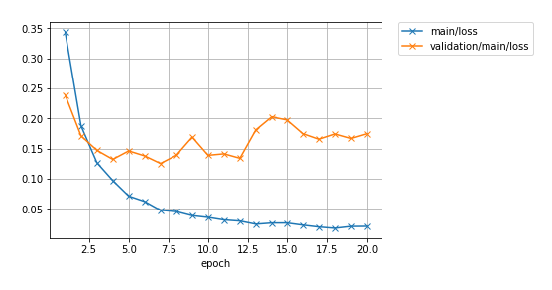

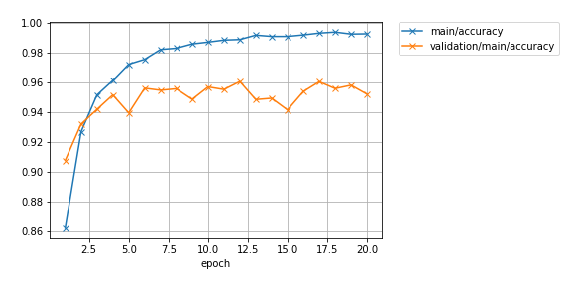

In [73]:
show_graph('result/loss.png')
show_graph('result/accuracy.png')

過学習気味

In [74]:
def predict(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred =  model.predictor(X[None, ...]).data.argmax()
    # データ数が2以上の場合はそのまま
    else:  
        pred =  model.predictor(X).data.argmax(axis=1)
    return pred

In [75]:
predict(model, X_chain_test)

array([1, 0, 0, ..., 1, 0, 0])

In [76]:
log_loss(y_chain_test, predict(model, X_chain_test))

1.6578834557844015

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_chain_test, predict(model, X_chain_test))

0.952

In [79]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [80]:
def predict_rate(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred =  model.predictor(X[None, ...]).data
        return softmax(pred)
    else:
        pred =  model.predictor(X).data
        for (i, p) in enumerate(pred):
            pred[i] = softmax(p)
        return pred

In [81]:
predict_rate(model, X_chain_test[0])

array([[6.842039e-12, 1.000000e+00]], dtype=float32)

In [82]:
log_loss(y_chain_test, predict_rate(model, X_chain_test)[:, 1])

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

In [167]:
0 in predict_rate(model, X_chain_test)[:, 1]

False

In [168]:
predict_rate(model, X_chain_test)

array([[0.37398162, 0.6260184 ],
       [0.3804614 , 0.61953855],
       [0.37156805, 0.628432  ],
       ...,
       [0.37583235, 0.6241676 ],
       [0.37816843, 0.62183154],
       [0.3807398 , 0.61926025]], dtype=float32)

In [85]:
class MLP_2(chainer.Chain):
    def __init__(self):
        super(MLP_2, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 1000)
            self.l4=L.Linear(1000, 300)
            self.l5=L.Linear(300,2)
        
    def __call__(self, X):
        h = F.relu(self.l1(X))
        h = F.relu(self.l2(h))
        h = F.relu(self.l3(h))
        h = F.relu(self.l4(h))
        return self.l5(h)

In [86]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 300)
            self.l4=L.Linear(300, 2)
        
    def __call__(self, X):
        h1 = F.relu(self.l1(X))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [87]:
model_2 = L.Classifier(MLP_2())
optimizer_2 = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer_2.setup(model) 

In [88]:
train = tuple_dataset.TupleDataset(X_chain_train, y_chain_train)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')
test = tuple_dataset.TupleDataset(X_chain_test,y_chain_test)
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy_2.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss_2.png'))
trainer.extend(extensions.ProgressBar())

In [89]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
     total [..................................................]  1.56%
this epoch [###############...................................] 31.25%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.12%
this epoch [###############################...................] 62.50%
       200 iter, 0 epoch / 20 epochs
    82.745 iters/sec. Estimated time to finish: 0:01:14.929049.
     total [##................................................]  4.69%
this epoch [##############################################....] 93.75%
       300 iter, 0 epoch / 20 epochs
    81.546 iters/sec. Estimated time to finish: 0:01:14.804635.
1           0.0212665   0.992813       0.190391              0.9545                    
     total [###...............................................]  6.25%
this epoch [############.........

     total [########################..........................] 48.44%
this epoch [##################################................] 68.75%
      3100 iter, 9 epoch / 20 epochs
    64.336 iters/sec. Estimated time to finish: 0:00:51.293115.
10          0.0112743   0.996625       0.187815              0.954125                  
     total [#########################.........................] 50.00%
this epoch [..................................................]  0.00%
      3200 iter, 10 epoch / 20 epochs
    63.672 iters/sec. Estimated time to finish: 0:00:50.257898.
     total [#########################.........................] 51.56%
this epoch [###############...................................] 31.25%
      3300 iter, 10 epoch / 20 epochs
    63.756 iters/sec. Estimated time to finish: 0:00:48.622678.
     total [##########################........................] 53.12%
this epoch [###############################...................] 62.50%
      3400 iter, 10 epoch / 20 epochs
 

19          0.0101128   0.996969       0.176246              0.962125                  
     total [###############################################...] 95.31%
this epoch [###...............................................]  6.25%
      6100 iter, 19 epoch / 20 epochs
    60.754 iters/sec. Estimated time to finish: 0:00:04.937977.
     total [################################################..] 96.88%
this epoch [##################................................] 37.50%
      6200 iter, 19 epoch / 20 epochs
    60.755 iters/sec. Estimated time to finish: 0:00:03.291899.
     total [#################################################.] 98.44%
this epoch [##################################................] 68.75%
      6300 iter, 19 epoch / 20 epochs
    60.752 iters/sec. Estimated time to finish: 0:00:01.646031.
20          0.00918399  0.997375       0.170273              0.9625                    
     total [##################################################] 100.00%
this epoch [........

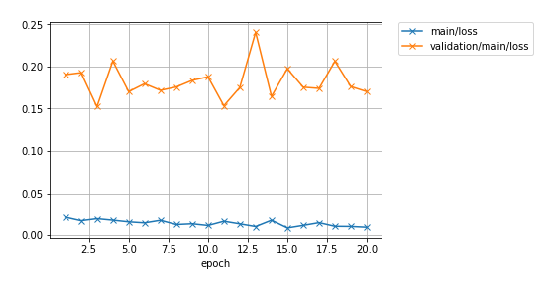

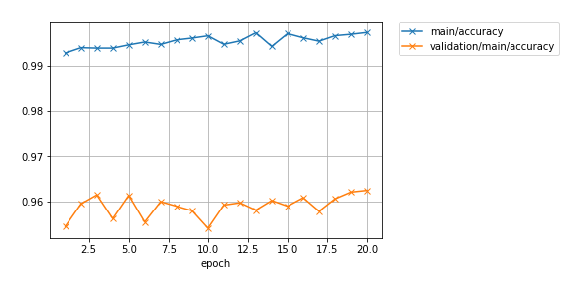

In [90]:
show_graph('result/loss_2.png')
show_graph('result/accuracy_2.png')

In [91]:
accuracy_score(y_chain_test, predict(model_2, X_chain_test))

0.520875

In [92]:
log_loss(y_chain_test, predict_rate(model_2, X_chain_test))

0.6963056743070484

In [93]:
predict_rate(model_2, X_chain_test)

array([[0.4643329 , 0.5356671 ],
       [0.4620476 , 0.5379524 ],
       [0.4307742 , 0.5692257 ],
       ...,
       [0.48970217, 0.51029783],
       [0.4236773 , 0.5763227 ],
       [0.51623446, 0.4837655 ]], dtype=float32)

In [94]:
log_loss(y_test, (predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test)) / 2)

0.07656441991740452

In [95]:
(predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test)) / 2

array([1.00000000e+00, 3.34830191e-10, 7.07187885e-02, ...,
       9.81476158e-01, 1.02021893e-01, 1.03515586e-01])

In [96]:
log_loss(y_test, (predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test) + xgr.predict(X_test)) / 3)

0.12023047242187883

In [174]:
log_loss(y_test, xgb.predict(X_test)) / 2

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.2434096433227768

MLPとrandam forest regressorの平均にしよう

In [152]:
class MLP_3(chainer.Chain):
    def __init__(self):
        super(MLP_3, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 300)
            self.l4=L.Linear(300, 2)
        
    def __call__(self, X):
        h1 = F.sigmoid(self.l1(X))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        return self.l4(h3)

In [154]:
model_3 = L.Classifier(MLP_3())
gpu = -1 

optimizer = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer.setup(model_3) 

In [155]:
train = tuple_dataset.TupleDataset(X_chain_train, y_chain_train)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')
test = tuple_dataset.TupleDataset(X_chain_test,y_chain_test)
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy_3.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss_3.png'))
trainer.extend(extensions.ProgressBar())

In [156]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
     total [..................................................]  1.56%
this epoch [###############...................................] 31.25%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.12%
this epoch [###############################...................] 62.50%
       200 iter, 0 epoch / 20 epochs
     71.53 iters/sec. Estimated time to finish: 0:01:26.676917.
     total [##................................................]  4.69%
this epoch [##############################################....] 93.75%
       300 iter, 0 epoch / 20 epochs
    66.714 iters/sec. Estimated time to finish: 0:01:31.435456.
1           0.436673    0.804781       0.712335              0.525375                  
     total [###...............................................]  6.25%
this epoch [############.........

     total [########################..........................] 48.44%
this epoch [##################################................] 68.75%
      3100 iter, 9 epoch / 20 epochs
    58.721 iters/sec. Estimated time to finish: 0:00:56.197779.
10          0.12854     0.950656       0.712335              0.525375                  
     total [#########################.........................] 50.00%
this epoch [..................................................]  0.00%
      3200 iter, 10 epoch / 20 epochs
    58.587 iters/sec. Estimated time to finish: 0:00:54.619464.
     total [#########################.........................] 51.56%
this epoch [###############...................................] 31.25%
      3300 iter, 10 epoch / 20 epochs
    59.086 iters/sec. Estimated time to finish: 0:00:52.466218.
     total [##########################........................] 53.12%
this epoch [###############################...................] 62.50%
      3400 iter, 10 epoch / 20 epochs
 

19          0.0545874   0.979344       0.712335              0.525375                  
     total [###############################################...] 95.31%
this epoch [###...............................................]  6.25%
      6100 iter, 19 epoch / 20 epochs
    62.076 iters/sec. Estimated time to finish: 0:00:04.832819.
     total [################################################..] 96.88%
this epoch [##################................................] 37.50%
      6200 iter, 19 epoch / 20 epochs
    62.256 iters/sec. Estimated time to finish: 0:00:03.212543.
     total [#################################################.] 98.44%
this epoch [##################################................] 68.75%
      6300 iter, 19 epoch / 20 epochs
    62.408 iters/sec. Estimated time to finish: 0:00:01.602349.
20          0.0482455   0.9825         0.712335              0.525375                  
     total [##################################################] 100.00%
this epoch [........

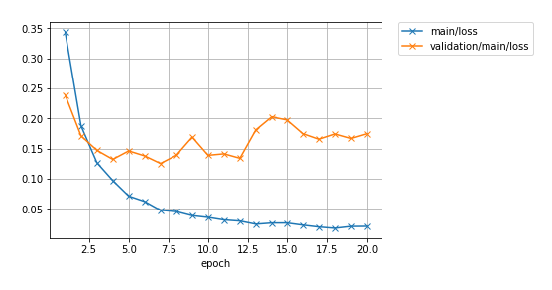

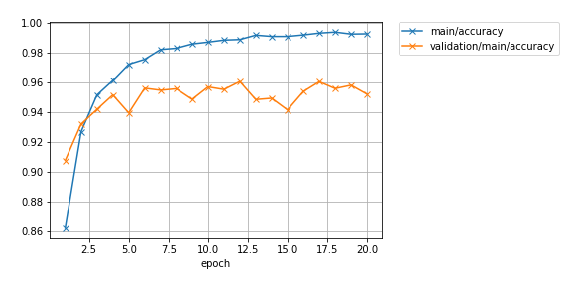

In [157]:
show_graph('result/loss.png')
show_graph('result/accuracy.png')

In [160]:
log_loss(y_test, (predict_rate(model_3, X_chain_test)[:,1] + rfr.predict(X_test) + predict_rate(model, X_chain_test)[:, 1]) / 3)

0.23658617648311545

In [161]:
log_loss(y_test, (predict_rate(model_3, X_chain_test)[:,1] + rfr.predict(X_test)) / 2)

0.07997228332322821

In [162]:
log_loss(y_test, predict_rate(model_3, X_chain_test)[:,1])

0.10109175962280392

## 提出

In [97]:
test_data = pd.read_csv('test.csv')

In [98]:
first_pokemon_test = pd.DataFrame(columns=pokemon.columns)
second_pokemon_test = pd.DataFrame(columns=pokemon.columns)
for d in test_data.values:
    first_pokemon_test = first_pokemon_test.append(pokemon.iloc[d[1]-1,:])
    second_pokemon_test = second_pokemon_test.append(pokemon.iloc[d[2]-1,:])

In [99]:
first_pokemon_test.columns = 'first_' + first_pokemon_test.columns
second_pokemon_test.columns = 'second_' + second_pokemon_test.columns

In [100]:
X_submit = pd.concat([test_data, first_pokemon_test.reset_index(drop=True), second_pokemon_test.reset_index(drop=True)], axis=1)

In [101]:
X_submit.iloc[0,:]

id                               0
First_pokemon                   85
Second_pokemon                 602
first_#                         85
first_Name                Rapidash
first_Type 1                  Fire
first_Type 2                   NaN
first_HP                        65
first_Attack                   100
first_Defense                   70
first_Sp. Atk                   80
first_Sp. Def                   80
first_Speed                    105
first_Generation                 1
first_Legendary              False
first_type_1_Bug                 0
first_type_1_Dark                0
first_type_1_Dragon              0
first_type_1_Electric            0
first_type_1_Fairy               0
first_type_1_Fighting            0
first_type_1_Fire                1
first_type_1_Flying              0
first_type_1_Ghost               0
first_type_1_Grass               0
first_type_1_Ground              0
first_type_1_Ice                 0
first_type_1_Normal              0
first_type_1_Poison 

In [102]:
X_submit = X_submit.drop('first_Type 1', axis=1).drop('first_Type 2', axis=1).drop('second_Type 1', axis=1).drop('second_Type 2', axis=1)

In [103]:
X_submit['first_Legendary'] = X_submit['first_Legendary'].map({False: 0, True: 1})
X_submit['second_Legendary'] = X_submit['second_Legendary'].map({False: 0, True: 1})

In [104]:
X_submit = X_submit.drop('first_Name', axis=1).drop('second_Name', axis=1)

In [105]:
X_submit

,id,First_pokemon,Second_pokemon,first_#,first_HP,first_Attack,first_Defense,first_Sp. Atk,first_Sp. Def,first_Speed,...,second_type_2_Ghost,second_type_2_Grass,second_type_2_Ground,second_type_2_Ice,second_type_2_Normal,second_type_2_Poison,second_type_2_Psychic,second_type_2_Rock,second_type_2_Steel,second_type_2_Water
0,0,85,602,85,65,100,70,80,80,105,...,0,1,0,0,0,0,0,0,0,0
1,1,536,155,536,50,65,107,105,107,86,...,0,0,0,0,0,0,0,0,0,0
2,2,189,644,189,90,30,15,40,20,15,...,0,0,0,0,0,0,0,0,0,0
3,3,526,166,526,85,80,70,135,75,90,...,0,0,0,0,0,0,0,0,0,0
4,4,690,772,690,100,123,75,57,75,80,...,0,0,0,0,0,0,0,0,0,0
5,5,764,17,764,71,73,88,120,89,59,...,0,0,0,0,0,1,0,0,0,0
6,6,103,175,103,60,65,80,170,95,130,...,0,0,0,0,0,0,0,0,0,0
7,7,212,392,212,65,65,60,130,95,110,...,0,0,0,0,0,0,0,0,0,0
8,8,34,682,34,75,100,110,45,55,65,...,0,0,0,0,0,0,0,0,0,0
9,9,470,422,470,76,48,48,57,62,34,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X_submit_std = scaler.transform(X_submit)

In [107]:
X_submit_std = StandardScaler().fit_transform(X_submit)

In [108]:
rfr_submit = RandomForestRegressor(n_estimators=1000)
rfr_submit.fit(X_std, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [109]:
model_submit = L.Classifier(MLP())
optimizer_submit = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer_submit.setup(model_submit) 

In [110]:
train = tuple_dataset.TupleDataset(X_chain, y_chain)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer_submit, device=gpu)
trainer_submit = training.Trainer(updater, (n_epoch,'epoch'), out='result')
trainer_submit.extend(extensions.ProgressBar())

In [111]:
trainer_submit.run()

     total [..................................................]  1.25%
this epoch [############......................................] 25.00%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  2.50%
this epoch [#########################.........................] 50.00%
       200 iter, 0 epoch / 20 epochs
    90.798 iters/sec. Estimated time to finish: 0:01:25.904915.
     total [#.................................................]  3.75%
this epoch [#####################################.............] 75.00%
       300 iter, 0 epoch / 20 epochs
     91.93 iters/sec. Estimated time to finish: 0:01:23.759069.
     total [##................................................]  5.00%
this epoch [..................................................]  0.00%
       400 iter, 1 epoch / 20 epochs
    92.629 iters/sec. Estimated time to finish: 0:01:22.047397.
     total [###....................

     total [#####################.............................] 42.50%
this epoch [#########################.........................] 50.00%
      3400 iter, 8 epoch / 20 epochs
    60.349 iters/sec. Estimated time to finish: 0:01:16.222699.
     total [#####################.............................] 43.75%
this epoch [#####################################.............] 75.00%
      3500 iter, 8 epoch / 20 epochs
    60.103 iters/sec. Estimated time to finish: 0:01:14.871198.
     total [######################............................] 45.00%
this epoch [..................................................]  0.00%
      3600 iter, 9 epoch / 20 epochs
    59.567 iters/sec. Estimated time to finish: 0:01:13.866700.
     total [#######################...........................] 46.25%
this epoch [############......................................] 25.00%
      3700 iter, 9 epoch / 20 epochs
    59.218 iters/sec. Estimated time to finish: 0:01:12.612805.
     total [################

     total [#########################################.........] 83.75%
this epoch [#####################################.............] 75.00%
      6700 iter, 16 epoch / 20 epochs
    56.732 iters/sec. Estimated time to finish: 0:00:22.914576.
     total [##########################################........] 85.00%
this epoch [..................................................]  0.00%
      6800 iter, 17 epoch / 20 epochs
    56.437 iters/sec. Estimated time to finish: 0:00:21.262549.
     total [###########################################.......] 86.25%
this epoch [############......................................] 25.00%
      6900 iter, 17 epoch / 20 epochs
    56.159 iters/sec. Estimated time to finish: 0:00:19.587222.
     total [###########################################.......] 87.50%
this epoch [#########################.........................] 50.00%
      7000 iter, 17 epoch / 20 epochs
    55.989 iters/sec. Estimated time to finish: 0:00:17.860759.
     total [############

In [112]:
X_submit_chain = X_submit_std.astype(xp.float32)

In [113]:
submit = (predict_rate(model_submit, X_submit_chain)[:,1] + rfr_submit.predict(X_submit_std)) / 2

first_pokemonが勝利する確率にする

In [119]:
submit = 1 - submit

In [120]:
submit_csv = pd.DataFrame(submit)

In [126]:
submit_csv.columns = ['probability']

In [127]:
submit_csv.to_csv('submit_ueda.csv')

In [142]:
for (i, e) in enumerate(predict(model, X_chain) == y_chain):
    if not(e):
        print(i)

65
98
123
223
328
355
376
382
416
427
457
644
795
829
838
845
959
1026
1080
1216
1467
1797
2007
2043
2544
2634
2783
2976
3085
3103
3182
3470
3497
3578
3792
3913
4034
4085
4129
4148
4336
4423
4662
4853
4855
4861
5051
5488
5583
5599
5669
5701
5728
5757
6011
6217
6226
6261
6289
6410
6503
6612
6639
6902
6912
6933
6977
7064
7081
7103
7210
7282
7348
7837
8135
8177
8213
8222
8285
8320
8359
8457
8792
8793
9048
9185
9384
9443
9458
10397
10458
10595
10979
11024
11031
11108
11170
11262
11371
11655
11770
12311
12468
12596
12658
12805
12906
12960
13023
13221
13277
13359
13538
13690
13825
13967
14085
14117
14178
14310
14326
14354
14485
14576
14632
14637
14663
14776
14917
15241
15309
15340
15435
15497
15673
15768
15770
15963
16166
16260
16353
16614
16864
16995
17085
17115
17327
17423
17844
17893
18112
18172
18241
18470
18522
18755
18955
18978
19046
19140
19148
19369
19443
19643
19645
19705
19708
19941
19951
19990
20122
20123
20179
20236
20396
20535
20709
20743
20774
20968
21078
21292
21296
21333
2134

In [132]:
import pickle

In [135]:
    # Pythonオブジェクトをpickleファイルとして保存
with open('model_2.pickle','wb') as f:
    pickle.dump(model_2, f) # (Pythonオブジェクト, pickleファイル)

with open('rfr.pickle','wb') as f:
    pickle.dump(rfr, f) # (Pythonオブジェクト, pickleファイル)

    # Pythonオブジェクトをpickleファイルとして保存
with open('first_pokemon.pickle','wb') as f:
    pickle.dump(first_pokemon, f) # (Pythonオブジェクト, pickleファイル)

with open('second_pokemon.pickle','wb') as f:
    pickle.dump(second_pokemon, f) # (Pythonオブジェクト, pickleファイル)

with open('first_pokemon_test.pickle','wb') as f:
    pickle.dump(first_pokemon_test, f) # (Pythonオブジェクト, pickleファイル)

with open('second_pokemon_test.pickle','wb') as f:
    pickle.dump(second_pokemon_test, f) # (Pythonオブジェクト, pickleファイル)

with open('model_submit.pickle','wb') as f:
    pickle.dump(model_submit, f) # (Pythonオブジェクト, pickleファイル)

with open('rfr_submit.pickle','wb') as f:
    pickle.dump(rfr_submit, f) # (Pythonオブジェクト, pickleファイル)

In [182]:
model_1 = model

In [183]:
with open('model.pickle','wb') as f:
    pickle.dump(model_1, f)

In [185]:
# pickleファイルをPythonオブジェクトとして読込
with open('model.pickle','rb') as f:
    loaded_obj = pickle.load(f)  # (pickleファイル)

# 読み込んだオブジェクトを確認
print(loaded_obj)

# 改善点

1. firstとsecondの差を説明変数にとる
2. いらないカラムを削除する
3. 他のモデル
4. もうちょい可視化、分析（random forestとか）